In [5]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *

In [4]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


age: patient age in years

sex: patient sex, 0 = Female, 1 = Male

cp: chest pain type, 1 = typical angina, 2 = atypical angina, 3 = non anginal 
pain, 4 = asymptomatic

trestbps: resting blood pressure in mmHg

chol: serum cholesterol in mg/dl

fbs: fasting blood sugar > 120 mg/dl, 0 = No, 1 = Yes

restecg: resting electrocardiographic results, 0 = normal, 1 = ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved in beats per minute

exang: exercise induced angina, 0 = No, 1 = Yes

oldpeak: ST depression induced by exercise relative to rest, the higher the 

value the greater the abnormality in the patient electrocardiogram

slope: the slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping

ca: count of the number of major vessels colored by flourosopy

thal: measured blood flow to the heart as a result of a thallium stress test, 3 = normal, 6 = fixed defect, 7 = reversable defect

In [56]:
heart_data['target'].value_counts(normalize=True)

1    0.542453
0    0.457547
Name: target, dtype: float64

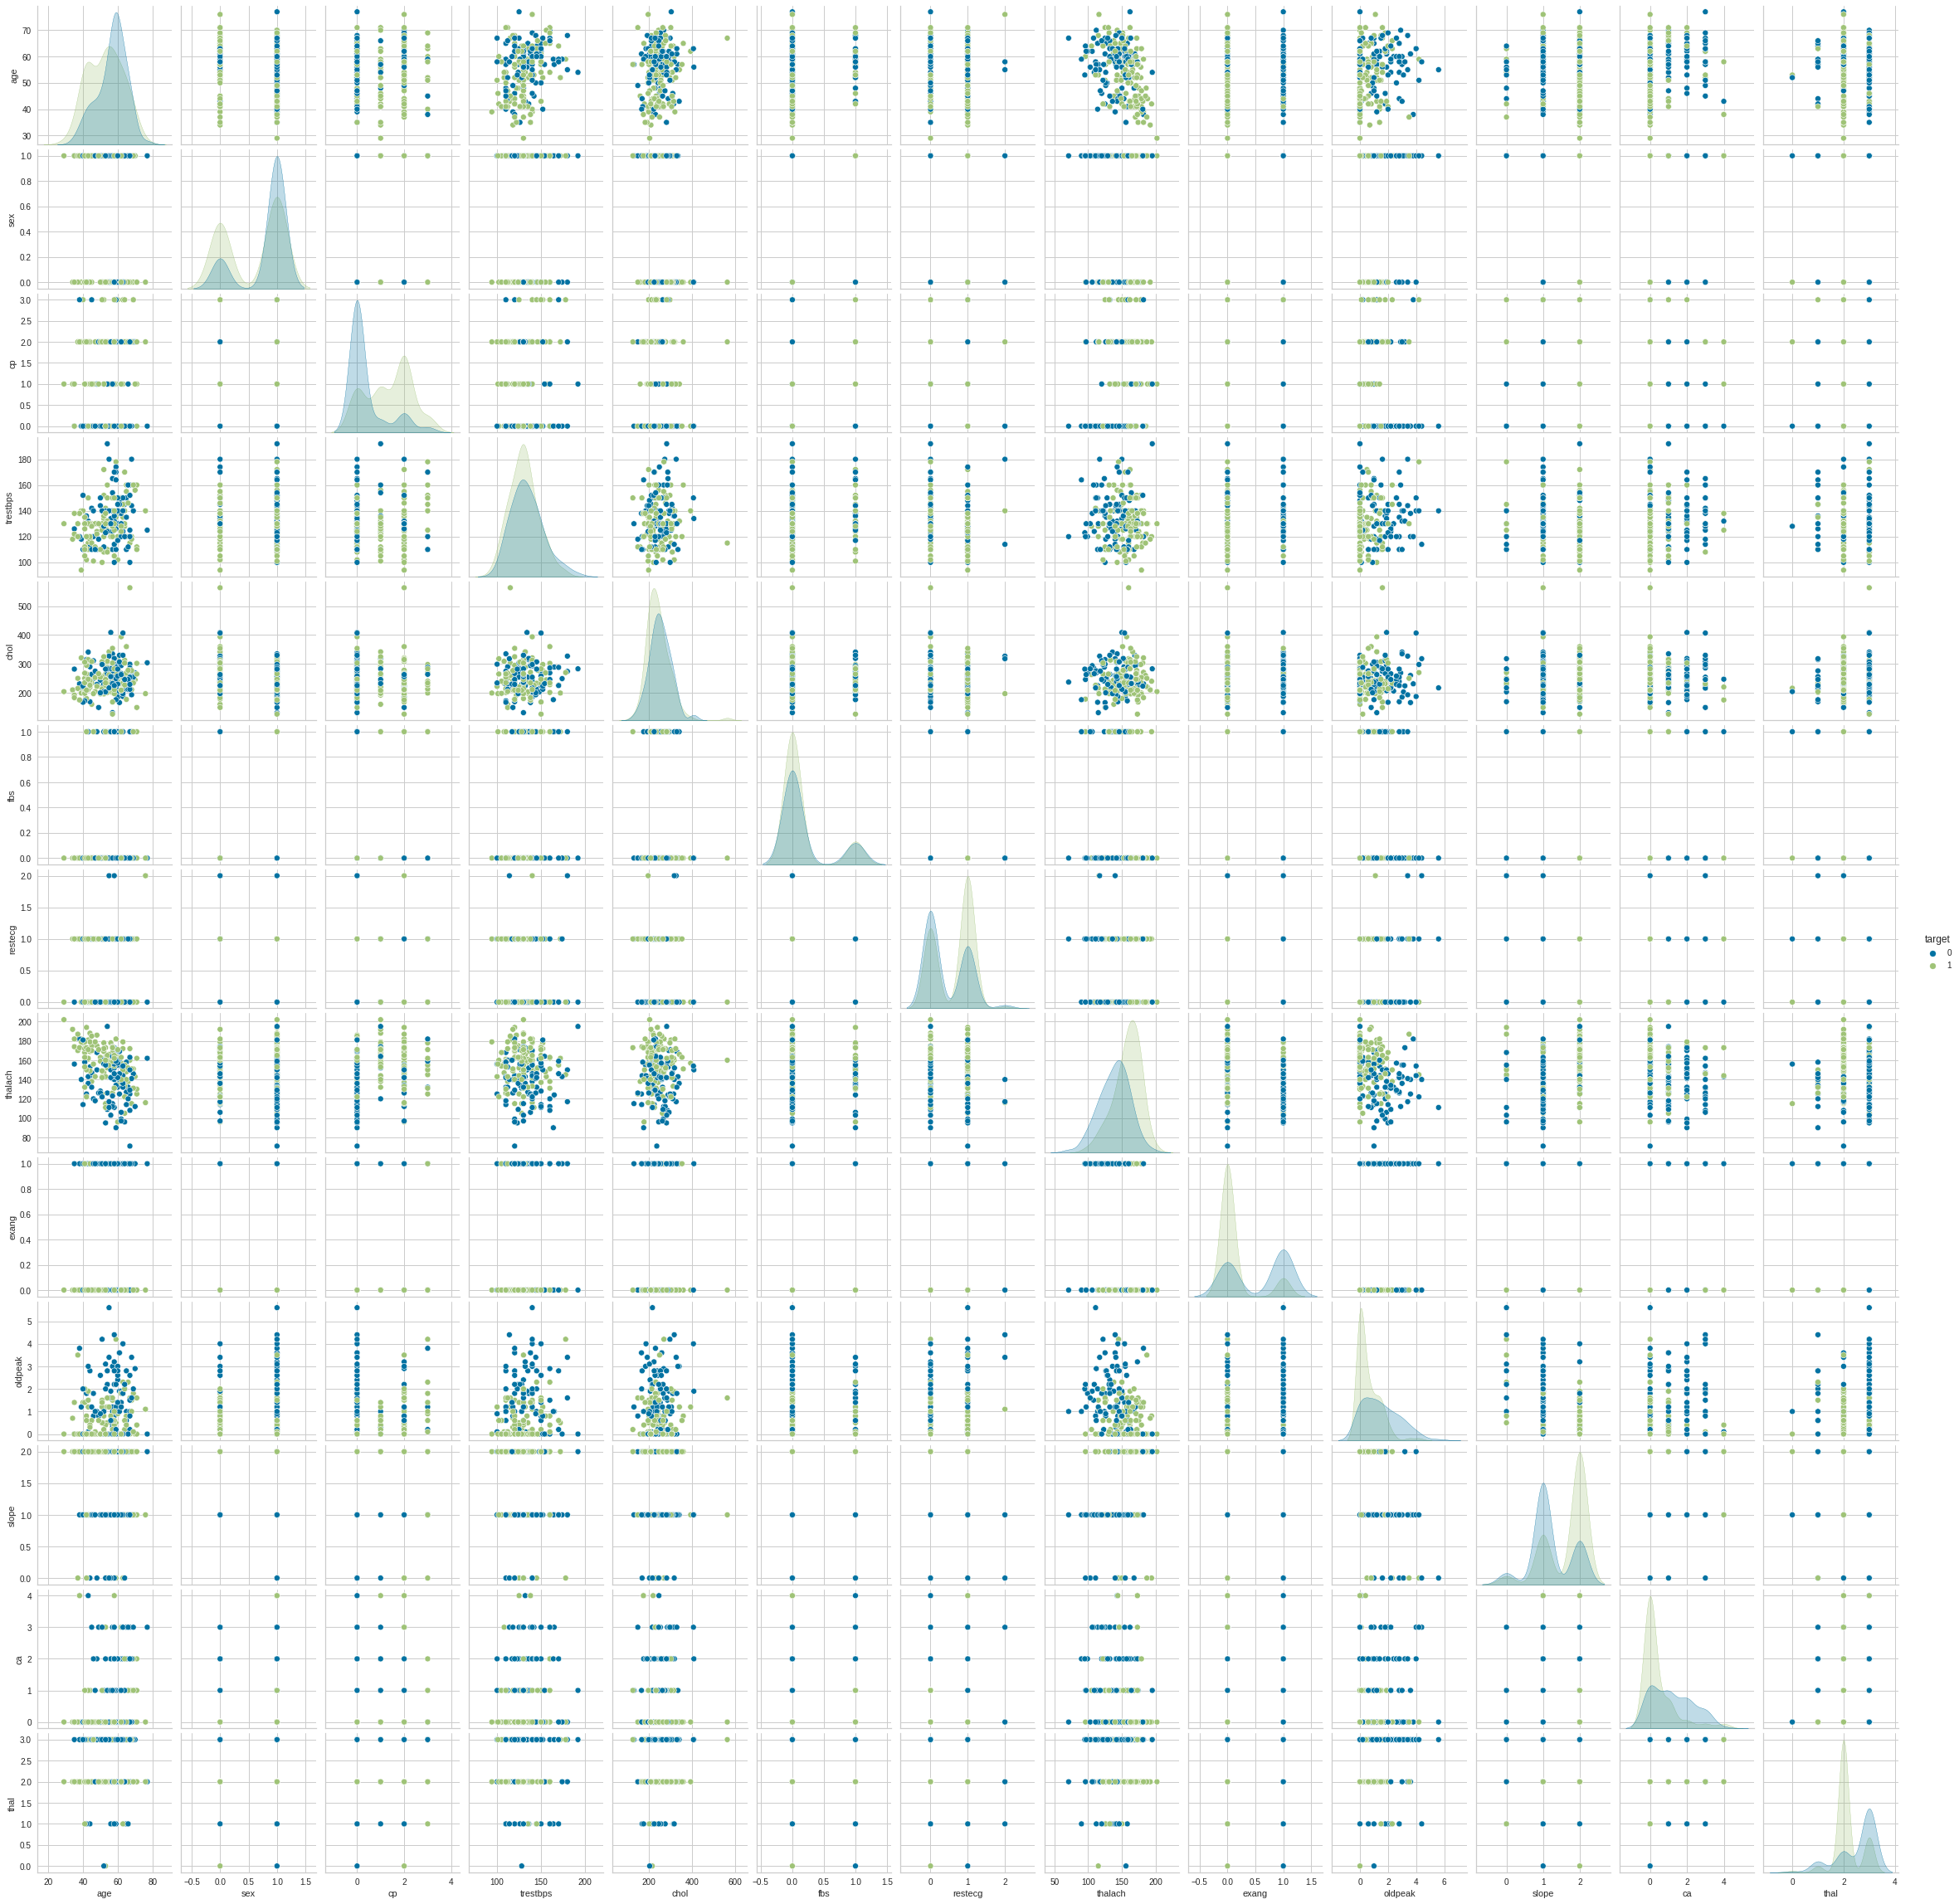

In [57]:
sns.pairplot(heart_data, hue="target")

In [6]:
exp1 = setup(heart_data,
             train_size=0.7,
             target='target',
             session_id=101,
             numeric_imputation = 'median',
             categorical_imputation = 'mode')

,Description,Value
0,session_id,101
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(212, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8171,0.8905,0.8625,0.8207,0.8320,0.6277,0.6477,0.466
lr,Logistic Regression,0.8105,0.9080,0.8875,0.8038,0.8352,0.6113,0.6372,0.437
ridge,Ridge Classifier,0.8029,0.0000,0.9000,0.7922,0.8330,0.5914,0.6248,0.016
et,Extra Trees Classifier,0.8029,0.8801,0.8500,0.8155,0.8261,0.5977,0.6131,0.460
lda,Linear Discriminant Analysis,0.7895,0.8929,0.8875,0.7775,0.8218,0.5644,0.5924,0.018
lightgbm,Light Gradient Boosting Machine,0.7833,0.8420,0.8250,0.8045,0.8064,0.5594,0.5759,0.075
ada,Ada Boost Classifier,0.7767,0.8089,0.8000,0.8148,0.7928,0.5466,0.5657,0.096
dt,Decision Tree Classifier,0.7638,0.7577,0.8250,0.7674,0.7921,0.5192,0.5265,0.019
nb,Naive Bayes,0.7438,0.8810,0.9250,0.7133,0.7990,0.4656,0.4994,0.018
gbc,Gradient Boosting Classifier,0.7367,0.8464,0.8125,0.7535,0.7715,0.4594,0.4847,0.081


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [8]:
# Creating a model with best performance
RF=create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,0.8929,0.8750,1.0000,0.9333,0.8673,0.8750
1,0.6667,0.8393,0.5000,0.8000,0.6154,0.3478,0.3780
2,0.8000,0.9464,1.0000,0.7273,0.8421,0.5872,0.6447
3,0.8667,0.9554,0.8750,0.8750,0.8750,0.7321,0.7321
4,0.8667,0.9464,1.0000,0.8000,0.8889,0.7273,0.7559
5,0.8667,0.9286,0.8750,0.8750,0.8750,0.7321,0.7321
6,0.8667,0.9107,0.8750,0.8750,0.8750,0.7321,0.7321
7,0.7333,0.8393,0.7500,0.7500,0.7500,0.4643,0.4643
8,0.7857,0.8125,1.0000,0.7273,0.8421,0.5333,0.6030
9,0.7857,0.8333,0.8750,0.7778,0.8235,0.5532,0.5594


In [9]:
# Model Tune
tuned_RF=tune_model(RF)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,0.9107,0.875,1.0000,0.9333,0.8673,0.8750
1,0.7333,0.8214,0.625,0.8333,0.7143,0.4737,0.4910
2,0.8000,0.9107,0.875,0.7778,0.8235,0.5946,0.6001
3,0.8000,0.9107,0.750,0.8571,0.8000,0.6018,0.6071
4,0.8667,0.8929,1.000,0.8000,0.8889,0.7273,0.7559
5,0.8000,0.9107,0.750,0.8571,0.8000,0.6018,0.6071
6,0.9333,0.9286,0.875,1.0000,0.9333,0.8673,0.8750
7,0.8000,0.8750,0.875,0.7778,0.8235,0.5946,0.6001
8,0.8571,0.8333,1.000,0.8000,0.8889,0.6957,0.7303
9,0.8571,0.8542,0.875,0.8750,0.8750,0.7083,0.7083


In [30]:
# We can evaluate the tuned model from different perspectives.
evaluate_model(tuned_RF)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [52]:
# We can also create, tune and ensemble the model with one line of code.
best_RF = ensemble_model(tune_model(create_model('rf'), choose_better=True), choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,0.8750,0.8750,1.0000,0.9333,0.8673,0.8750
1,0.6667,0.8214,0.5000,0.8000,0.6154,0.3478,0.3780
2,0.8667,0.9107,1.0000,0.8000,0.8889,0.7273,0.7559
3,0.8000,0.8750,0.7500,0.8571,0.8000,0.6018,0.6071
4,0.8667,0.9107,1.0000,0.8000,0.8889,0.7273,0.7559
5,0.8667,0.9286,0.8750,0.8750,0.8750,0.7321,0.7321
6,0.9333,0.9643,0.8750,1.0000,0.9333,0.8673,0.8750
7,0.8000,0.8929,0.8750,0.7778,0.8235,0.5946,0.6001
8,0.7143,0.8333,0.7500,0.7500,0.7500,0.4167,0.4167
9,0.8571,0.8542,0.8750,0.8750,0.8750,0.7083,0.7083


## What does the model say?

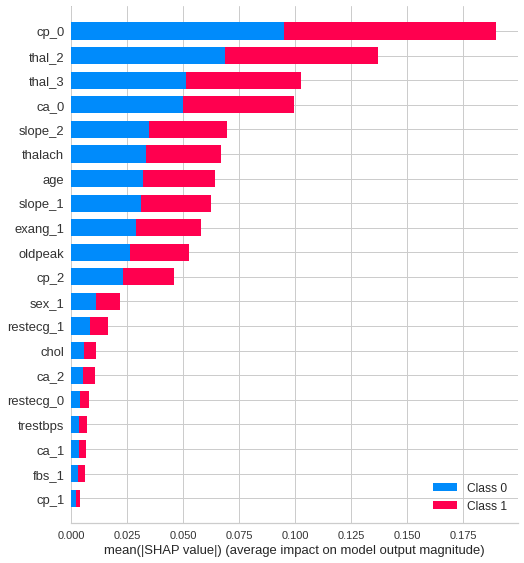

In [33]:
# understanding what is driving predictions using SHAP
interpret_model(tuned_RF)

##### As seen above cp_0, thal_2 and thal_3 have great impact on class 1

**Checking an individual observation**

In [34]:
# Interpereting a single observation
interpret_model(tuned_RF, "reason", observation=33)

**Dependence Plot**

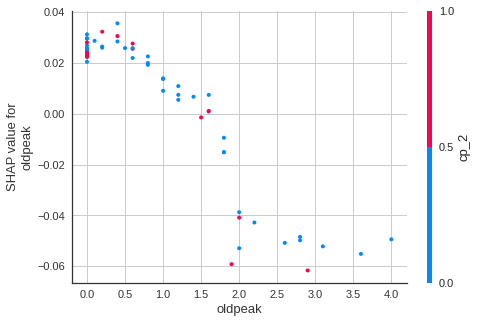

In [40]:
# Lets look at dependence plot as well
interpret_model(tuned_RF, "correlation", feature="oldpeak")

### Making Predictions

In [41]:

pred = predict_model(tuned_RF)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8125,0.9291,0.6571,1.0,0.7931,0.6346,0.6818


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_1,restecg_0,restecg_1,restecg_2,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target,Label,Score
0,52.0,128.0,255.0,161.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.7251
1,43.0,110.0,211.0,161.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.5575
2,71.0,112.0,149.0,125.0,1.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.5796
3,52.0,120.0,325.0,172.0,0.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9352
4,37.0,120.0,215.0,170.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9731


In [42]:
pred.Score.describe()

count    64.000000
mean      0.747950
std       0.134730
min       0.514700
25%       0.616325
50%       0.753400
75%       0.852575
max       0.977300
Name: Score, dtype: float64

In [53]:
# Another version of making predictions
pred2=predict_model(best_RF)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8125,0.9291,0.6571,1.0,0.7931,0.6346,0.6818


In [54]:
# Another way of choosing, tunning and ensembling the best model
best_model = ensemble_model(tune_model(compare_models(), choose_better = True), choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,0.8750,0.8750,1.0000,0.9333,0.8673,0.8750
1,0.6667,0.8214,0.5000,0.8000,0.6154,0.3478,0.3780
2,0.8667,0.9107,1.0000,0.8000,0.8889,0.7273,0.7559
3,0.8000,0.8750,0.7500,0.8571,0.8000,0.6018,0.6071
4,0.8667,0.9107,1.0000,0.8000,0.8889,0.7273,0.7559
5,0.8667,0.9286,0.8750,0.8750,0.8750,0.7321,0.7321
6,0.9333,0.9643,0.8750,1.0000,0.9333,0.8673,0.8750
7,0.8000,0.8929,0.8750,0.7778,0.8235,0.5946,0.6001
8,0.7143,0.8333,0.7500,0.7500,0.7500,0.4167,0.4167
9,0.8571,0.8542,0.8750,0.8750,0.8750,0.7083,0.7083


In [55]:
pred3=predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8125,0.9291,0.6571,1.0,0.7931,0.6346,0.6818
